<a href="https://colab.research.google.com/github/PavanKumar1124/week5/blob/main/exp6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Load the Iris dataset
iris = load_iris()

# Split the dataset into features (X) and target variable (y)
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Gaussian Naïve Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix",cm)

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix [[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]


In [10]:
!pip install squarify


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of the dataset: (7501, 20)
First few rows of the dataset:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13    

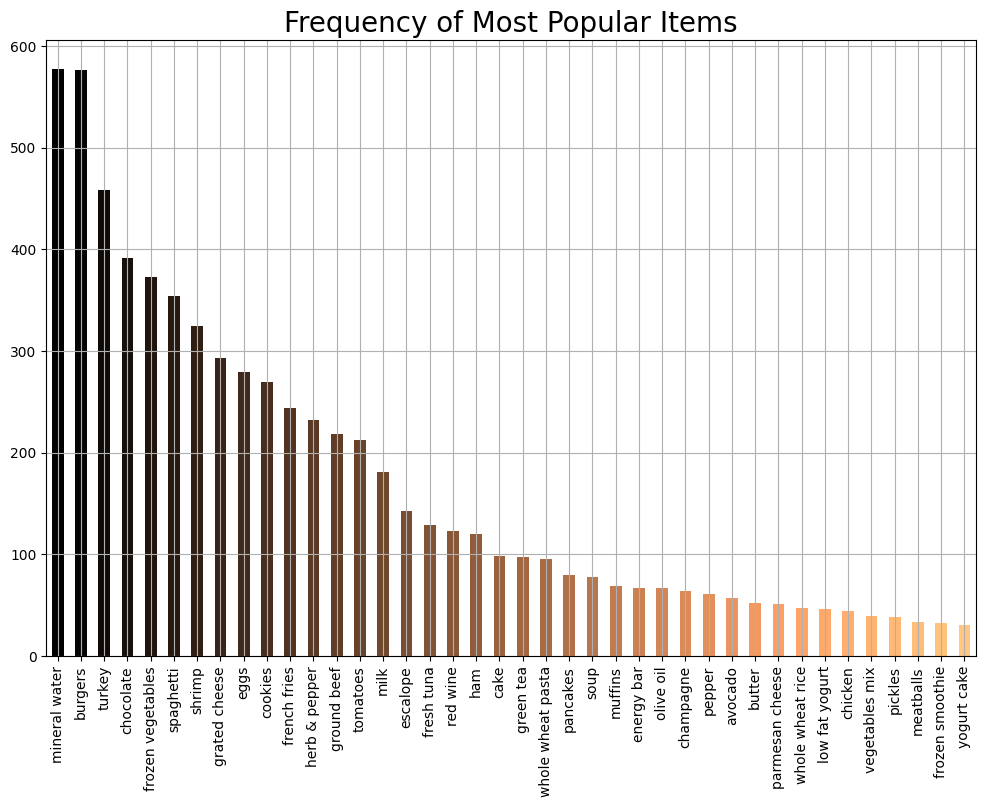

/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: Deprecatio

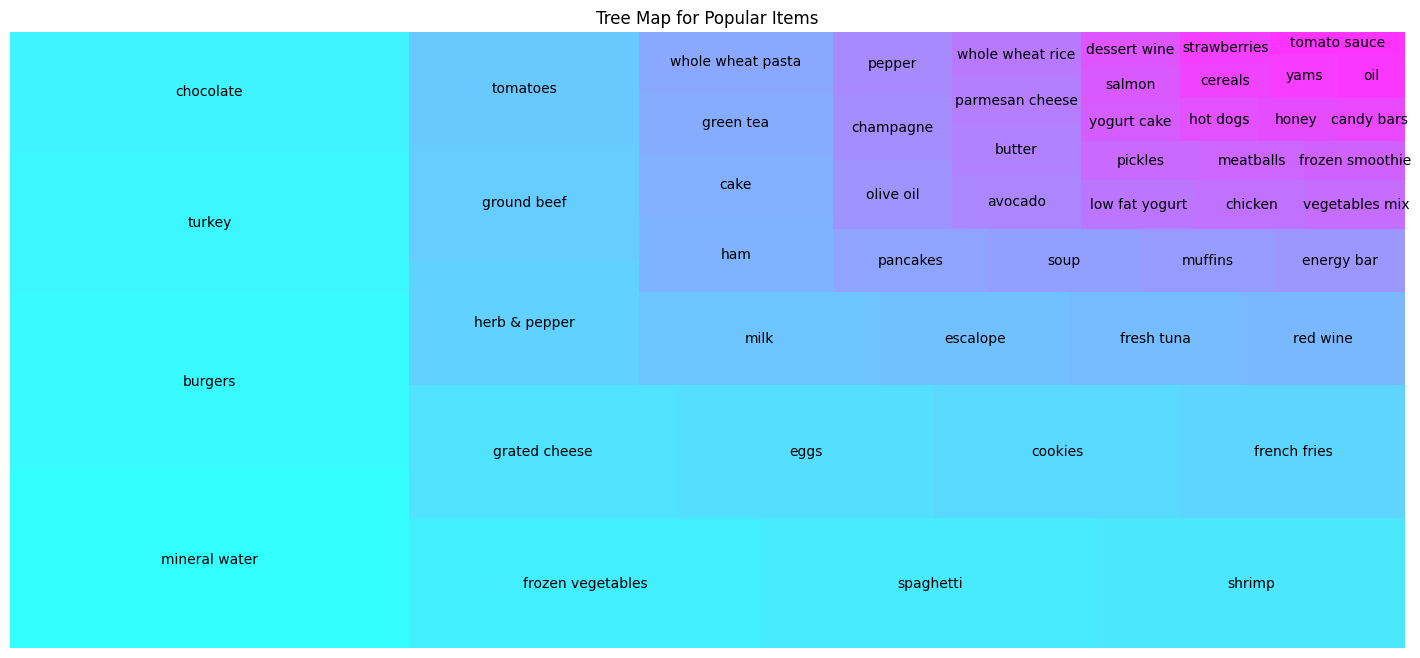

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


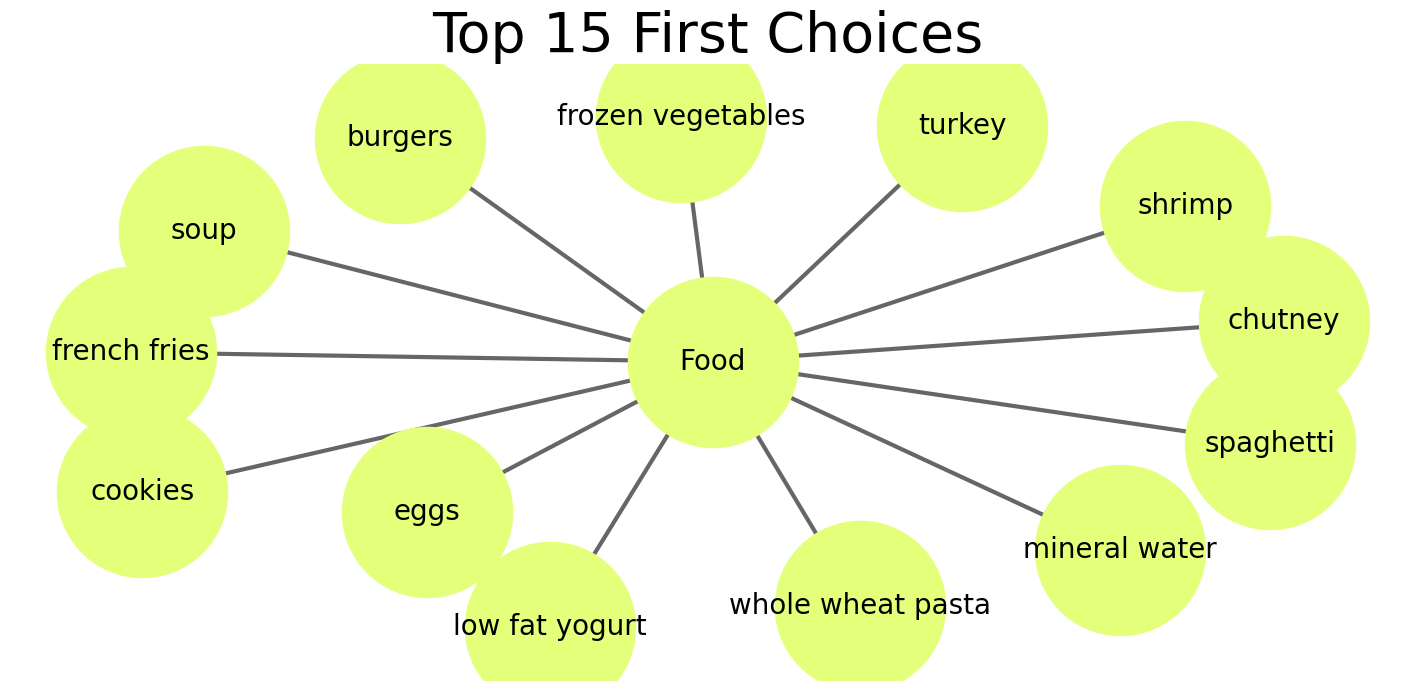

Frequent Itemsets with at least 5% support:
      support                               itemsets
0    1.000000                                 (Food)
1    0.087188                              (burgers)
2    0.081056                                 (cake)
3    0.059992                              (chicken)
4    0.163845                            (chocolate)
..        ...                                    ...
110  0.050927             (eggs, mineral water, nan)
111  0.059725        (nan, mineral water, spaghetti)
112  0.052660  (Food, chocolate, mineral water, nan)
113  0.050927       (Food, eggs, mineral water, nan)
114  0.059725  (Food, nan, mineral water, spaghetti)

[115 rows x 2 columns]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
# Load the dataset
data = pd.read_csv('/content/store_data.csv', header=None)
# Let's check the shape of the dataset
print("Shape of the dataset:", data.shape)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
# Set the size of the plot
plt.rcParams['figure.figsize'] = (12, 8)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color=color)
plt.title('Frequency of Most Popular Items', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()
y = data[0].value_counts().head(50).to_frame()
y.index
plt.rcParams['figure.figsize'] = (18, 8)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()
data['food'] = 'Food'
food = data.truncate(before=-1, after=15)
import networkx as nx
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)

# Generate the layout for the nodes
pos = nx.spring_layout(food)

# Generate colors for the nodes
color = plt.cm.Wistia(np.linspace(0, 15, 1))
# Draw the nodes with specified positions, sizes, and colors
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)

# Draw the edges of the graph
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')

# Add labels to the nodes
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')

# Turn off the axis
plt.axis('off')

# Add grid lines
plt.grid()

# Set the title of the plot
plt.title('Top 15 First Choices', fontsize=40)

# Display the plot
plt.show()

# Convert the dataset into a list of lists format
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])

# Initialize TransactionEncoder
te = TransactionEncoder()
# Fit and transform the data into one-hot encoded format
te_ary = te.fit(transactions).transform(transactions)
# Convert one-hot encoded data into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with min_support = 0.01

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)




